In [1]:
!pip install requests
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [2]:


import os
import subprocess
import librosa
import matplotlib.pyplot as plt
import librosa.display

def download_youtube_audio(youtube_url, output_path):
    print(f"Downloading from {youtube_url}...")
    command = [
        'yt-dlp',
        '-f', 'bestaudio/best',
        '--extract-audio',
        '--audio-format', 'mp3',
        '--output', output_path,
        youtube_url
    ]
    subprocess.run(command, check=True)
    print(f"Downloaded and saved to {output_path}")

def extract_mfcc_features(audio_path, sr=22050, n_mfcc=13):
    audio, sample_rate = librosa.load(audio_path, sr=sr)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    return mfccs, sample_rate, audio

def visualize_mfcc(mfccs, sr, title, hop_length=512):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time', hop_length=hop_length)
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'MFCC - {title}')
    plt.tight_layout()
    plt.show()

In [ ]:
def compare_mfccs(youtube_urls, output_paths, titles):
    for youtube_url, output_path in zip(youtube_urls, output_paths):
        download_youtube_audio(youtube_url, output_path)

    for output_path, title in zip(output_paths, titles):
        mfccs, sample_rate, audio = extract_mfcc_features(output_path)
        print(f"MFCC Shape for {title}: {mfccs.shape}")
        visualize_mfcc(mfccs, sr=sample_rate, title=title)

    compare_timbre(output_paths, titles)
    compare_rhythmic_patterns(output_paths, titles)
    compare_genre_emotion(output_paths, titles)

def compare_timbre(output_paths, titles):
    for output_path, title in zip(output_paths, titles):
        mfccs, sample_rate, _ = extract_mfcc_features(output_path)
        delta_mfccs = librosa.feature.delta(mfccs)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(delta_mfccs, sr=sample_rate, x_axis='time')
        plt.colorbar()
        plt.title(f'Timbre (Delta MFCC) - {title}')
        plt.tight_layout()
        plt.show()
def compare_rhythmic_patterns(output_paths, titles):
    for output_path, title in zip(output_paths, titles):
        _, sample_rate, audio = extract_mfcc_features(output_path)
        hop_length = 512
        onset_env = librosa.onset.onset_strength(y=audio, sr=sample_rate, hop_length=hop_length)
        times = librosa.times_like(onset_env, sr=sample_rate, hop_length=hop_length)
        plt.figure(figsize=(10, 4))
        plt.plot(times, onset_env, label='Onset Strength')
        plt.title(f'Rhythmic Patterns - {title}')
        plt.xlabel('Time (s)')
        plt.ylabel('Onset Strength')
        plt.tight_layout()
        plt.show()
def compare_genre_emotion(output_paths, titles):
    for output_path, title in zip(output_paths, titles):
        mfccs, sample_rate, _ = extract_mfcc_features(output_path)
        chroma = librosa.feature.chroma_stft(y=mfccs[1], sr=sample_rate)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', sr=sample_rate)
        plt.colorbar()
        plt.title(f'Genre & Emotion (Chroma) - {title}')
        plt.tight_layout()
        plt.show()

In [ ]:
def visualize_mfcc_for_duration(audio_path, title, duration=10, sr=22050, n_mfcc=13):
    audio, sample_rate = librosa.load(audio_path, sr=sr, duration=duration)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'MFCC (First {duration}s) - {title}')
    plt.tight_layout()
    plt.show()

Downloaded and saved to lofi_audio.mp3
Downloaded and saved to canon_audio.mp3
MFCC Shape for Lo-fi Track: (13, 6489)


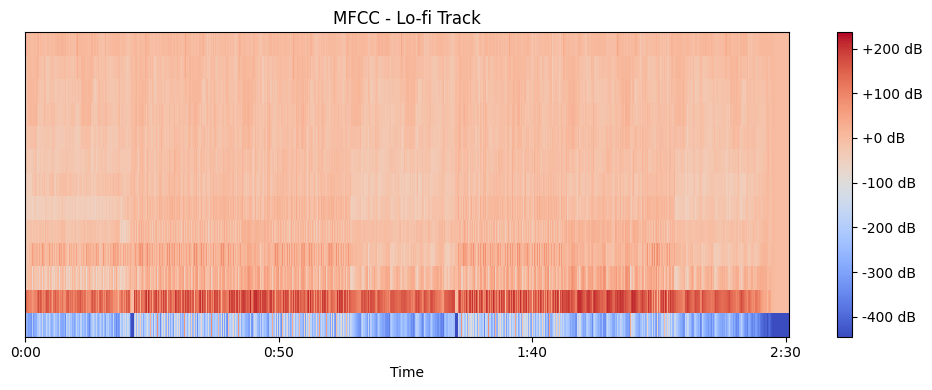

MFCC Shape for Canon in D Major: (13, 7879)


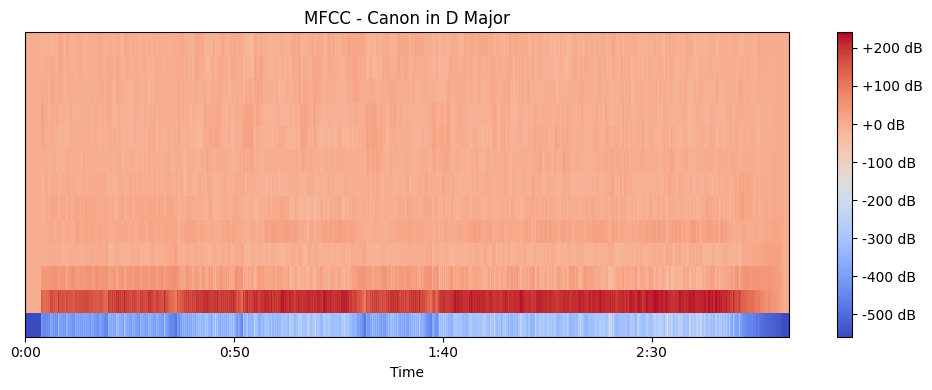

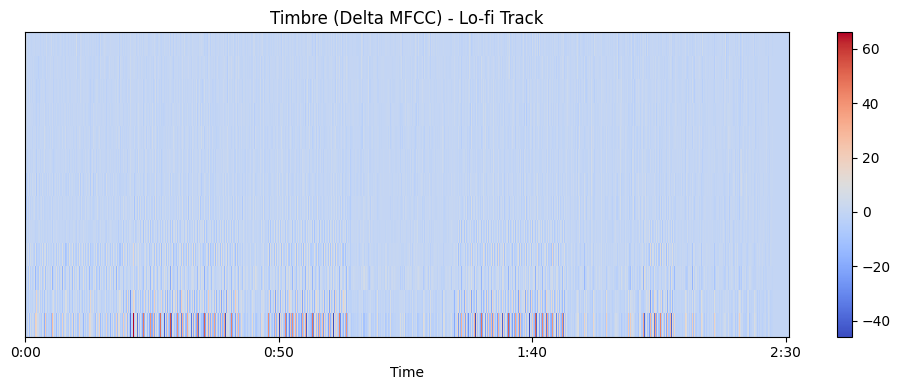

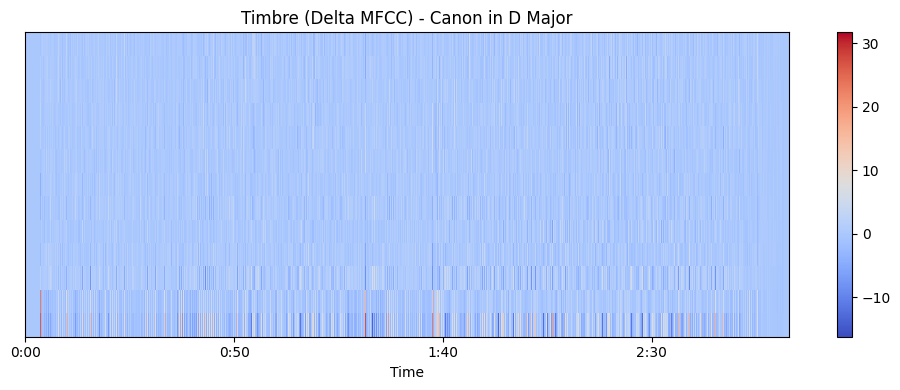

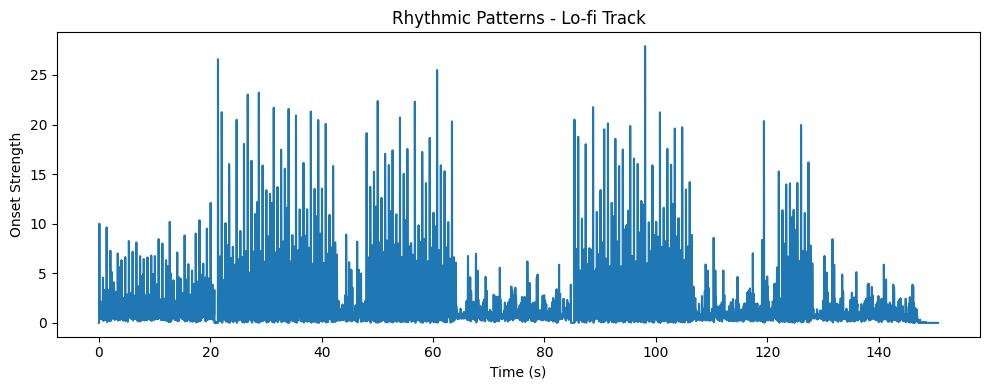

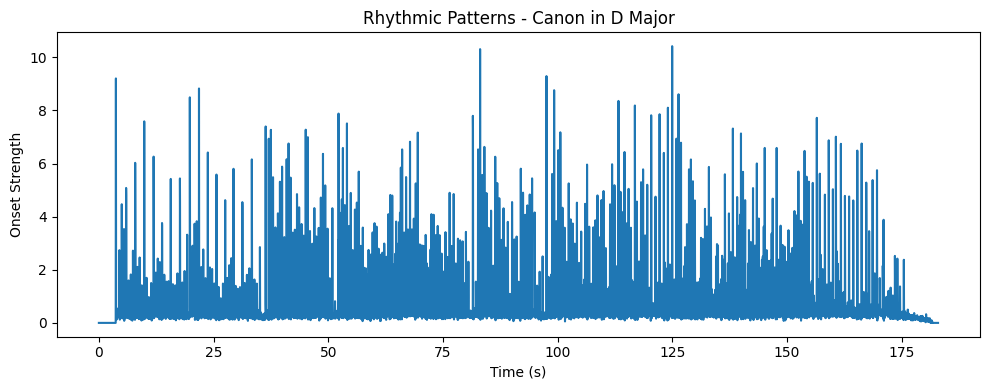

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


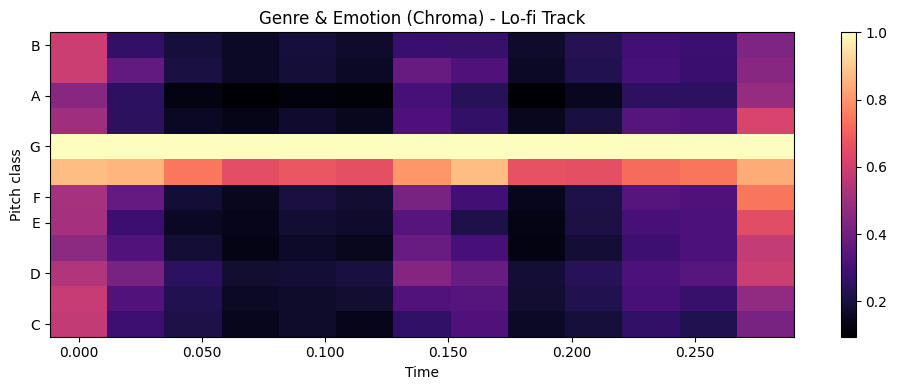

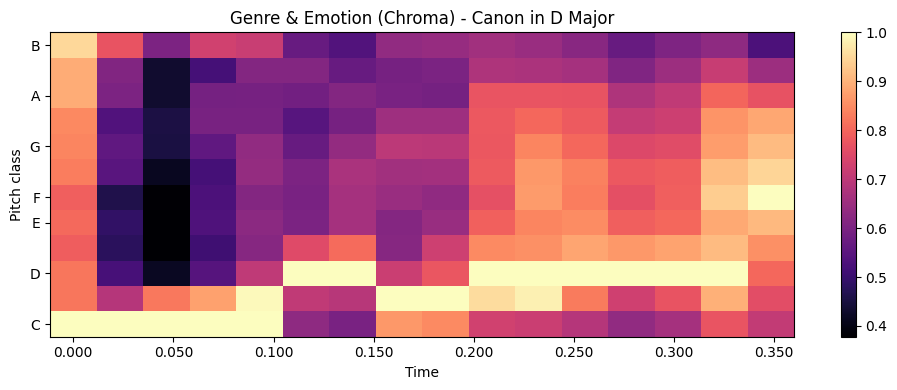

In [ ]:
youtube_urls = [
        "https://www.youtube.com/watch?v=QCzRXx1DA_U",
        "https://www.youtube.com/watch?v=1elGqARTb1Q"
]
output_paths = ["lofi_audio.mp3", "canon_audio.mp3"]
titles = ["Lo-fi Track", "Canon in D Major"]

compare_mfccs(youtube_urls, output_paths, titles)

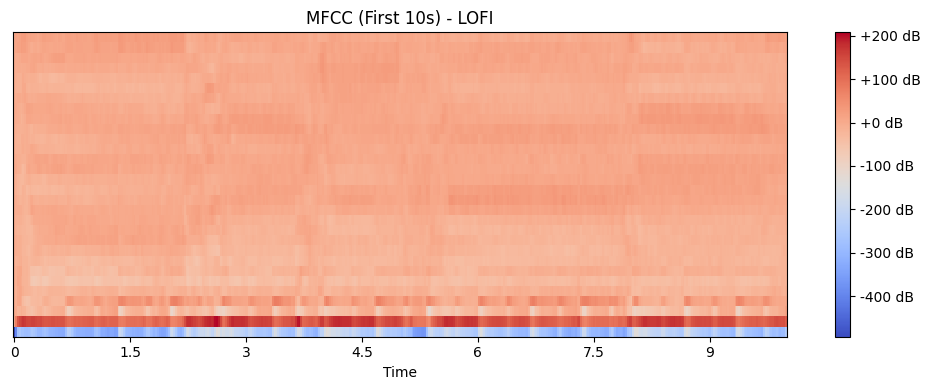

In [ ]:
visualize_mfcc_for_duration('/content/lofi_audio.mp3','LOFI', duration=10, sr=22050, n_mfcc=30)

In [3]:
!pip install pytube ffmpeg-python librosa tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.1 MB/s eta 0:00:00


In [4]:
import os
from pytube import YouTube,Playlist
import ffmpeg
import librosa
import numpy as np
import tensorflow as tf

import tempfile

In [5]:
from keras import models,layers

In [6]:
pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.1/252.1 kB 4.3 MB/s eta 0:00:00


In [13]:
def get_all_genres():
    return sp.recommendation_genre_seeds()


In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

def get_all_genres():
    all_genres = sp.recommendation_genre_seeds()['genres']
    return all_genres

# Fit the LabelEncoder with all possible genres
all_possible_genres = get_all_genres()
all_possible_genres.append('rap')
all_possible_genres.append('slap house')
label_encoder.fit(all_possible_genres)

LabelEncoder()

In [54]:
print(all_possible_genres)

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age', 'new-release', 'opera', 'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'pop-film', 'post-dubstep', 'power-po

In [9]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '499e8531441948d2b969c873772464d1'
client_secret = '5583ce79d5354c25a248d54ef7704ecb'


client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_track_features(track_id):
    track = sp.track(track_id)
    audio_features = sp.audio_features(track_id)[0]
    artist_ids = [artist['id'] for artist in track['artists']]
    artist_infos = [sp.artist(artist_id) for artist_id in artist_ids]

    features = {
        "Acousticness": audio_features.get('acousticness', 0),
        "Danceability": audio_features.get('danceability', 0),
        "Energy": audio_features.get('energy', 0),
        "Instrumentalness": audio_features.get('instrumentalness', 0),
        "Key": audio_features.get('key', 0),
        "Liveness": audio_features.get('liveness', 0),
        "Loudness": audio_features.get('loudness', 0),
        "Mode": audio_features.get('mode', 0),
        "Speechiness": audio_features.get('speechiness', 0),
        "Tempo": audio_features.get('tempo', 0),
        "Time Signature": audio_features.get('time_signature', 0),
        "Valence": audio_features.get('valence', 0),
        "Artists": [artist['name'] for artist in track['artists']],
        "Album Name": track['album']['name'],
        "Album Type": track['album']['album_type'],
        "Release Date": track['album']['release_date'],
        "Popularity": track['popularity'],
        "Duration": track['duration_ms'],
        "Explicit": track['explicit'],
        "Genres": sp.artist(track['artists'][0]['id']).get('genres', []),
        "Artist Popularity": [artist_info['popularity'] for artist_info in artist_infos],
        "Artist Followers": [artist_info['followers']['total'] for artist_info in artist_infos]
    }

    return features




track_id = 'https://open.spotify.com/track/6NMtzpDQBTOfJwMzgMX0zl?si=d53d4ad5551f4955'
track_features = get_track_features(track_id)
print(track_features)

{'Acousticness': 0.00146, 'Danceability': 0.46, 'Energy': 0.686, 'Instrumentalness': 0, 'Key': 0, 'Liveness': 0.375, 'Loudness': -5.948, 'Mode': 0, 'Speechiness': 0.0367, 'Tempo': 148.054, 'Time Signature': 4, 'Valence': 0.252, 'Artists': ['Travis Scott'], 'Album Name': 'ASTROWORLD', 'Album Type': 'album', 'Release Date': '2018-08-03', 'Popularity': 76, 'Duration': 145588, 'Explicit': True, 'Genres': ['rap', 'slap house'], 'Artist Popularity': 92, 'Artist Followers': 30326339}


In [16]:
from datetime import datetime

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [62]:
def download_youtube_audio(url):
    try:
        yt = YouTube(url)
        audio_stream = yt.streams.filter(only_audio=True).first()
        temp_audio_file = tempfile.mktemp(suffix=".mp4")
        output_file = tempfile.mktemp(suffix=".mp3")
        audio_stream.download(filename=temp_audio_file)
        ffmpeg.input(temp_audio_file).output(output_file).run(quiet=True, overwrite_output=True)
        os.remove(temp_audio_file)
        return output_file
    except Exception as e:
        print(f"Error downloading or converting audio from {url}: {e}")
        return None
def encode_genres(genres, all_genres):
    genre_vector = np.zeros(len(all_genres))
    for genre in genres:
        if genre in all_genres:
            genre_vector[all_genres.index(genre)] = 1
    return genre_vector

def extract_audio_features(audio_path, spotify_features, scaler=scaler, sr=22050, duration=30):
    try:
        y, sr = librosa.load(audio_path, sr=sr, duration=duration)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T
        chroma = librosa.feature.chroma_stft(y=y, sr=sr).T
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr).T
        tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr).T
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).T
        zcr = librosa.feature.zero_crossing_rate(y=y).T

        librosa_features = np.hstack([
            mfcc.mean(axis=0),
            chroma.mean(axis=0),
            spectral_contrast.mean(axis=0),
            tonnetz.mean(axis=0),
            rolloff.mean(axis=0),
            zcr.mean(axis=0)
        ])

        features = {
            'mode_confidence': np.nanmean(tonnetz),
            'key_confidence': np.nanmean(chroma),
            'tempo_confidence': np.nanmean(librosa.beat.beat_track(y=y, sr=sr)[0]),
            'melody': np.nanmean(librosa.feature.melspectrogram(y=y, sr=sr)),
            'harmony': np.nanmean(librosa.effects.hpss(y)[0]),
            'timbre': np.nanmean(librosa.feature.mfcc(y=y, sr=sr)),
            'beat_strength': np.nanmean(librosa.beat.beat_track(y=y, sr=sr)[0]),
            'chroma_features': np.nanmean(chroma),
            'spectral_contrast': np.nanmean(spectral_contrast)
        }

        artist_popularity = np.array(spotify_features.get('Artist Popularity', []))
        artist_followers = np.array(spotify_features.get('Artist Followers', []))

        if artist_popularity.size > 0 and artist_followers.size > 0:
            artist_rating = np.mean((artist_popularity + 10 * np.log1p(artist_followers)) / 100)
            features['Artist Rating'] = artist_rating
        else:
            features['Artist Rating'] = 0

        album_popularity = spotify_features.get('Popularity', 0)
        features['Album Rating'] = album_popularity / 100

        genres = spotify_features.get('Genres', [])
        if genres:
            genre_labels = label_encoder.transform(genres)
            genre_encoded = np.mean(genre_labels)
        else:
            genre_encoded = 0  # Default or unknown genre encoding

        features['Genre'] = genre_encoded

        release_date_str = spotify_features.get('Release Date', '')
        if release_date_str:
            release_date = datetime.strptime(release_date_str, '%Y-%m-%d')
            days_since_release = (datetime.now() - release_date).days
            features['Days Since Release'] = days_since_release
        else:
            features['Days Since Release'] = 0

        spotify_features_dict = {
            'Acousticness': spotify_features.get('Acousticness', 0),
            'Danceability': spotify_features.get('Danceability', 0),
            'Energy': spotify_features.get('Energy', 0),
            'Instrumentalness': spotify_features.get('Instrumentalness', 0),
            'Key': spotify_features.get('Key', 0),
            'Liveness': spotify_features.get('Liveness', 0),
            'Loudness': spotify_features.get('Loudness', 0),
            'Mode': spotify_features.get('Mode', 0),
            'Speechiness': spotify_features.get('Speechiness', 0),
            'Tempo': spotify_features.get('Tempo', 0),
            'Time Signature': spotify_features.get('Time Signature', 0),
            'Valence': spotify_features.get('Valence', 0),
            'Duration': spotify_features.get('Duration', 0),
            'Explicit': int(spotify_features.get('Explicit', False)),
        }

        combined_features = np.hstack([
            librosa_features,
            list(features.values()),
            list(spotify_features_dict.values())
        ])

        return combined_features

    except Exception as e:
        print(features)
        print(spotify_features_dict)
        print(f"Error extracting features from {audio_path}: {e}")
        return None

def build_autoencoder(input_dim):
    input_layer = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(128, activation='relu')(input_layer)
    encoded = layers.Dense(64, activation='relu')(encoded)
    encoded = layers.Dense(32, activation='relu')(encoded)

    decoded = layers.Dense(64, activation='relu')(encoded)
    decoded = layers.Dense(128, activation='relu')(decoded)
    decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = models.Model(input_layer, decoded)
    encoder = models.Model(input_layer, encoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

def train_autoencoder(features, epochs=100, batch_size=256):
    try:
        input_dim = features.shape[1]
        autoencoder, encoder = build_autoencoder(input_dim)
        history = autoencoder.fit(features, features, epochs=epochs, batch_size=batch_size, shuffle=True)
        autoencoder.save('/content/autoencoder.h5')
        encoder.save('/content/encoder.h5')
        return autoencoder, encoder
    except Exception as e:
        print(f"Error training autoencoder: {e}")
        return None, None

def generate_embeddings(audio_features, encoder):
    try:
        return encoder.predict(audio_features)
    except Exception as e:
        print(f"Error generating embeddings: {e}")
        return None

def youtube_to_embeddings(youtube_url,spotify_url, duration=30):
    audio_path = download_youtube_audio(youtube_url)
    if not audio_path:
        return None
    spotify_features=get_track_features(spotify_url)
    features = extract_audio_features(audio_path,spotify_features,all_possible_genres,duration=duration)
    if features is None:
        return None
    features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)
    autoencoder, encoder = train_autoencoder(features)
    if encoder is None:
        return None
    embeddings = generate_embeddings(features, encoder)
    return embeddings


In [64]:
print(x.shape)

(67,)


In [58]:
x.shape

(67,)

In [6]:
from pytube import YouTube, Playlist
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
scaler = StandardScaler()

In [18]:
def youtube_playlist_to_embeddings(playlist_url, duration=30,scaler= scaler):
    try:
        playlist = Playlist(playlist_url)
        all_features = []

        for idx, video_url in enumerate(playlist.video_urls[:20]):
            print(f"Processing {video_url}")
            audio_path = download_youtube_audio(video_url)
            if not audio_path:
                continue
            features = extract_audio_features(audio_path, duration=duration)
            if features is None:
                continue
            all_features.append(features)
            os.remove(audio_path)

        if len(all_features) == 0:
            print("No valid features extracted.")
            return None

        all_features = np.vstack(all_features)
        all_features = scaler.fit_transform(all_features)
        return all_features
    except Exception as e:
        print(f"Error processing playlist: {e}")
        return None


In [12]:
all_features= youtube_playlist_to_embeddings('https://www.youtube.com/playlist?list=PL64wzBYskfhG0LEafmVKcFwJBcs7uKcYm')


Processing https://www.youtube.com/watch?v=HwVnX4ZgliY
Processing https://www.youtube.com/watch?v=v2AC41dglnM
Processing https://www.youtube.com/watch?v=Lo2qQmj0_h4
Processing https://www.youtube.com/watch?v=zFt0tO4Op14
Processing https://www.youtube.com/watch?v=HdAkYCyCZv8
Processing https://www.youtube.com/watch?v=yU6gG-p5FZc
Processing https://www.youtube.com/watch?v=Gu2pVPWGYMQ
Processing https://www.youtube.com/watch?v=u9Dg-g7t2l4
Processing https://www.youtube.com/watch?v=4CI3lhyNKfo
Processing https://www.youtube.com/watch?v=CnAmeh0-E-U
Processing https://www.youtube.com/watch?v=U9OQAySv184
Processing https://www.youtube.com/watch?v=r7qovpFAGrQ
Processing https://www.youtube.com/watch?v=q0hyYWKXF0Q
Processing https://www.youtube.com/watch?v=9de6jeOevi8
Processing https://www.youtube.com/watch?v=WXBHCQYxwr0
Processing https://www.youtube.com/watch?v=0iwPcKGqnoA
Processing https://www.youtube.com/watch?v=AWGqoCNbsvM
Processing https://www.youtube.com/watch?v=2Y6Nne8RvaA
Processing

In [21]:
autoencoder, encoder, losses = train_autoencoder(all_features)
embeddings = generate_embeddings(all_features, encoder)

Epoch 1/100
101/101 [==============================] - 2s 5ms/step - loss: 0.9536
Epoch 2/100
101/101 [==============================] - 1s 5ms/step - loss: 0.7539
Epoch 3/100
101/101 [==============================] - 1s 5ms/step - loss: 0.6771
Epoch 4/100
101/101 [==============================] - 1s 6ms/step - loss: 0.6479
Epoch 5/100
101/101 [==============================] - 1s 8ms/step - loss: 0.6367
Epoch 6/100
101/101 [==============================] - 1s 13ms/step - loss: 0.6291
Epoch 7/100
101/101 [==============================] - 2s 18ms/step - loss: 0.6239
Epoch 8/100
101/101 [==============================] - 1s 14ms/step - loss: 0.6196
Epoch 9/100
101/101 [==============================] - 1s 10ms/step - loss: 0.6161
Epoch 10/100
101/101 [==============================] - 2s 16ms/step - loss: 0.6134
Epoch 11/100
101/101 [==============================] - 1s 8ms/step - loss: 0.6115
Epoch 12/100
101/101 [==============================] - 1s 7ms/step - loss: 0.6100
Epoch 13

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


808/808 [==============================] - 4s 5ms/step


In [22]:
import joblib
joblib.dump(scaler, '/content/scaler.pkl')

['/content/scaler.pkl']

In [31]:
def load_models_and_generate_embeddings(youtube_url, duration=30):
    audio_path = download_youtube_audio(youtube_url)
    if not audio_path:
        return None
    features = extract_audio_features(audio_path, duration=duration)
    print(features.shape)
    if features is None:
        return None

    scaler = joblib.load('/content/scaler.pkl')
    features = scaler.transform(features)

    from keras.models import load_model
    encoder = load_model('/content/encoder.h5')

    embeddings = generate_embeddings(features, encoder)
    return embeddings

In [32]:
new_url = 'https://www.youtube.com/watch?v=tAyYYKcySXA' # Travis Scott - SKELETONS
new_embeddings = load_models_and_generate_embeddings(new_url)


(1292, 40)
41/41 [==============================] - 0s 2ms/step


In [27]:
new_embeddings

array([[ 0.       ,  0.       , 14.566174 , ...,  3.2126482,  2.1915762,
         8.756276 ],
       [ 0.       ,  0.       , 13.065266 , ...,  2.5090797,  0.8067301,
         7.515791 ],
       [ 0.       ,  0.       , 12.171408 , ...,  2.0899093,  0.       ,
         6.7504835],
       ...,
       [ 0.       ,  0.       ,  6.7975235, ..., 10.714779 ,  4.920342 ,
         8.726599 ],
       [ 0.       ,  0.       ,  6.9771266, ..., 11.162194 ,  4.732714 ,
         9.042798 ],
       [ 0.       ,  0.       , 10.710424 , ...,  8.815241 ,  3.6373491,
         7.9668627]], dtype=float32)

In [36]:

urls = [
    'https://www.youtube.com/watch?v=HwVnX4ZgliY',
    'https://www.youtube.com/watch?v=v2AC41dglnM',
    'https://www.youtube.com/watch?v=ktvTqknDobU',
    'https://www.youtube.com/watch?v=AcXp7m1g5yE',
]
db_features=youtube_playlist_database(urls)

Processing https://www.youtube.com/watch?v=HwVnX4ZgliY
Processing https://www.youtube.com/watch?v=v2AC41dglnM
Processing https://www.youtube.com/watch?v=ktvTqknDobU
Processing https://www.youtube.com/watch?v=AcXp7m1g5yE


In [37]:
print(db_features.shape)

(5168, 40)


In [65]:
import pandas as pd

In [72]:
reshaped_features = db_features.reshape(4,1292,40)

embeddings_list = []
for i in range(4):
    song_features = reshaped_features[i][np.newaxis, ...]
    embeddings = encoder.predict(song_features).squeeze(0)
    embeddings_list.append(embeddings)



1/1 [==============================] - 0s 51ms/step
[[ 0.         0.        13.348031  ...  2.7137885  1.9073507  9.096402 ]
 [ 0.         0.        11.912748  ...  2.0273678  3.107732   6.9394383]
 [ 0.         0.        10.834304  ...  1.832202   3.4969654  5.749464 ]
 ...
 [ 0.         0.         7.6237164 ...  9.571143   7.15356    5.463144 ]
 [ 0.         0.         8.77591   ...  9.737658   4.6940455  7.4813795]
 [ 0.         0.        11.035128  ...  6.2184215  3.0864074  7.628981 ]]


In [76]:
from sklearn.metrics.pairwise import cosine_similarity
def compute_cosine_similarity(embedding, embedding2):
    similarities = cosine_similarity(embedding, embedding2)
    return similarities



In [81]:
print(np.sum(compute_cosine_similarity(new_embeddings, embeddings_list[3])))

1521618.9


In [90]:
def find_most_similar_song(new_url, encoder, embeddings_list, duration=30):
    new_embeddings = load_models_and_generate_embeddings(new_url, duration=duration)
    if new_embeddings is None:
        return None

    similarities=[]
    for i in range(len(embeddings_list)):
        similarities.append(np.sum(compute_cosine_similarity(new_embeddings, embeddings_list[i])))
    return(similarities.index(max(similarities)))
    #most_similar_idx = np.argmax(similarities)
    #return most_similar_idx

In [91]:

new_url = 'https://www.youtube.com/watch?v=nZo1pPyNExo'

print(find_most_similar_song(new_url, encoder, embeddings_list))


(1292, 40)
41/41 [==============================] - 0s 2ms/step
2


In [92]:
from keras.utils import plot_model

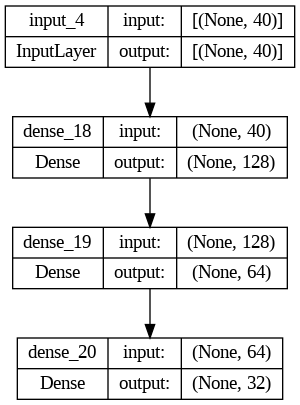

In [93]:
plot_model(encoder, to_file='encoder_model.png', show_shapes=True, show_layer_names=True)

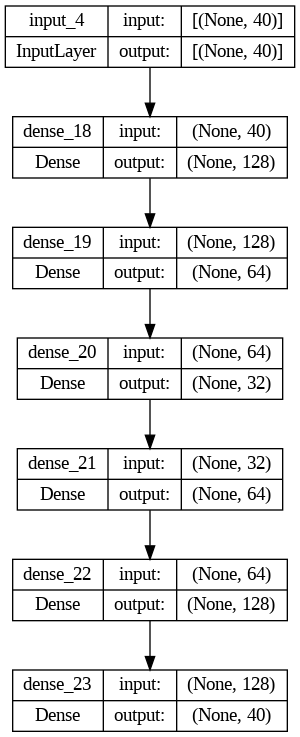

In [94]:
plot_model(autoencoder, to_file='encoder_model.png', show_shapes=True, show_layer_names=True)